Pytorch에 저장되어 있는 데이터셋을 불러와서
데이터셋 구조에 대해 살펴 봅시다

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

데이터 불러오기

- Train과 Test 데이터셋을 분리해서 가져옵니다.

https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html

```
torchvision.datasets.FashionMNIST(root: Union[str, Path], train: bool = True,
     transform: Optional[Callable] = None,
     target_transform: Optional[Callable] = None,
     download: bool = False)

```

In [ ]:
# Train dataset
training_data = datasets.FashionMNIST(
    root="data",    # 저장할 위치
    train=True,     # 훈련 데이터셋
    download=True,  # 다운로드 실행
    transform=ToTensor(),   # 변환할 함수
)

# Test Dataset
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11006043.91it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200699.86it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3749125.54it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21700780.90it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



파일 창을 살펴보면 data 폴더가 생성되고, 데이터가 저장된 것을 확인할 수 있습니다.


In [ ]:
!ls

data  sample_data


데이터셋을 살펴봅시다

In [ ]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [ ]:
dir(training_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

https://pytorch.org/vision/main/_modules/torchvision/datasets/mnist.html#FashionMNIST

소스코드 참고

```
 __getitem__()
 ```
 리스트처럼 인덱싱이 가능하도록 만들어줌


In [ ]:
class ExampleClass:
    def __init__(self, data):
        self.data = data

    def __getitem__(self, key):
        return self.data[key]

# 예제 객체 생성 및 사용
example = ExampleClass([1, 2, 3, 4, 5])
print(example[2])  # 출력: 3


3


첫번째 데이터셋을 살펴봅시다.

이미지와 라벨이 함께 Tuple로 묶여있습니다 .

In [ ]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

이미지를 출력해봅시다.


In [ ]:
training_data[0][0].shape  # 이미지는 컬러채널이 1입니다. matplotlib에서는 회색조는 컬러채널을 없애줘야 합니다.

torch.Size([1, 28, 28])

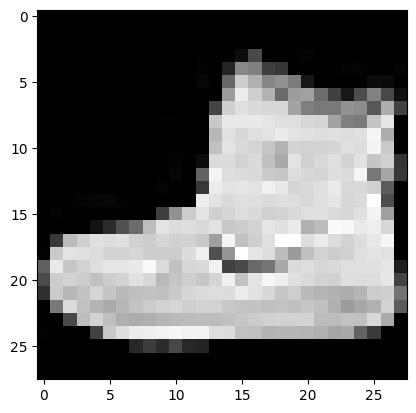

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0].squeeze(), cmap='gray')

해당하는 라벨은 9입니다.

In [ ]:
training_data[0][1]

9

데이터셋에 클래스 정보를 확인할 수 있습니다.

In [ ]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
training_data.class_to_idx  # 9번은 앵클 부츠입니다 .

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

pytorch 데이터셋은 DataLoader를 사용하여 batch단위로 학습할 수 있습니다.

https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [ ]:
batch_size = 64

# 데이터 로더 만들기
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


In [ ]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [ ]:
dir(train_dataloader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

In [ ]:
# 데이터로더는 반복문에서 batch 단위로 데이터를 넘깁니다.
# Fashion Mnist 데이터셋은 이미지, 라벨 형태로 데이터가 넘어갑니다

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break  # 한번만 출력하기 위해서 추가

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


__iter__ 와 __next__ 구현을 통해 인스턴스가 for 문에서 반복이 되게 할 수 있습니다.

In [ ]:
class Counter:
    def __init__(self, low, high):
        self.current = low
        self.high = high

    def __iter__(self):
        return self

    def __next__(self):
        # 현재 값이 최대값보다 작거나 같으면 현재 값을 반환하고, 현재 값을 1 증가시킵니다.
        if self.current > self.high:
            raise StopIteration
        else:
            self.current += 1
            return self.current - 1


In [ ]:
counter = Counter(1, 3)
for number in counter:
    print(number)


1
2
3
